#社会保険料の推移分析（１９５１～２０２３）

＃＃　プロジェクト概要

厚生労働省の統計データを用いて、日本の社会保険料の長期的な推移を分析する。
社会保険制度の持続が可能か、少子高齢化の影響について考察することを目的とする。

＃＃使用ツール

・Python(pandas, matplotlib)

・Google Colab

・データ：　厚生労働省「社会保障財源（ILO基準）」より

＃＃　分析手順

１，Excelファイルを読み込む

２，年度ごとの社会保険料合計を可視化する

３，グラフの傾向を確認し、社会的要因と関連付けて考察する


In [ ]:
from google.colab import files
uploaded=files.upload()



Saving syakaihokenn failu.xlsx to syakaihokenn failu.xlsx


   Unnamed: 0 Fiscal year    Unnamed: 2    Total  Social Insurance  \
0         NaN        1951        (昭和26)   2023.0            1146.0   
1         NaN        1954  (        29)   4417.0            1959.0   
2         NaN        1957  (        32)   5839.0            4032.0   
3         NaN        1960  (        35)   9260.0            6290.0   
4         NaN        1961  (        36)  11545.0            6552.0   

   Contribution from insured persons  Contribution from insured employers  \
0                              568.0                                578.0   
1                             1047.0                                912.0   
2                             1383.0                               2649.0   
3                             2430.0                               3860.0   
4                             3038.0                               3514.0   

      Tax  State\ncontribution  Other public\ncontribution  ...   Unnamed: 14  \
0   738.0                478.0     

/tmp/ipython-input-2729642514.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple["Total"]=pd.to_numeric(df_simple["Total"],errors="coerce")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27424 (\N{CJK UNIFIED IDEOGRAPH-6B20}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

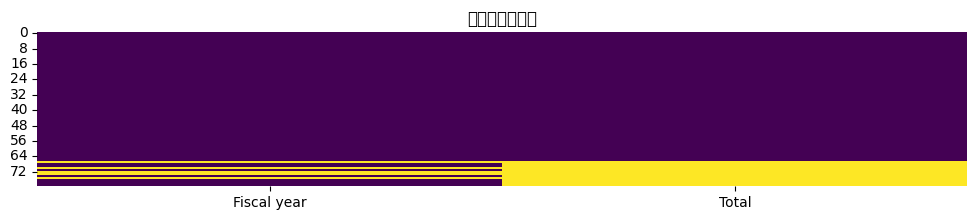

/tmp/ipython-input-2729642514.py:37: UserWarning: Glyph 31038 (\N{CJK UNIFIED IDEOGRAPH-793E}) missing from font(s) DejaVu Sans.
  plt.savefig("syakaihoken_graph_png")
/tmp/ipython-input-2729642514.py:37: UserWarning: Glyph 20250 (\N{CJK UNIFIED IDEOGRAPH-4F1A}) missing from font(s) DejaVu Sans.
  plt.savefig("syakaihoken_graph_png")
/tmp/ipython-input-2729642514.py:37: UserWarning: Glyph 20445 (\N{CJK UNIFIED IDEOGRAPH-4FDD}) missing from font(s) DejaVu Sans.
  plt.savefig("syakaihoken_graph_png")
/tmp/ipython-input-2729642514.py:37: UserWarning: Glyph 38522 (\N{CJK UNIFIED IDEOGRAPH-967A}) missing from font(s) DejaVu Sans.
  plt.savefig("syakaihoken_graph_png")
/tmp/ipython-input-2729642514.py:37: UserWarning: Glyph 26009 (\N{CJK UNIFIED IDEOGRAPH-6599}) missing from font(s) DejaVu Sans.
  plt.savefig("syakaihoken_graph_png")
/tmp/ipython-input-2729642514.py:37: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.savefig("syakaihoken_graph_png")


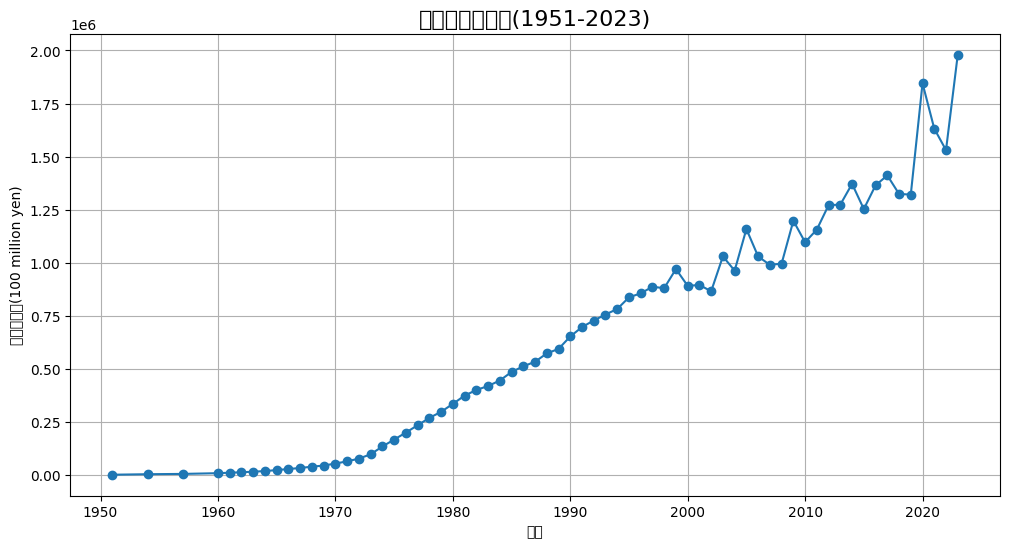

In [ ]:
#import⇒必要な道具を呼び出す
import pandas as pd #pandas⇒データを表で扱う
import matplotlib.pyplot as plt #matplotlib⇒グラフを書く
import seaborn as sns

#データを読み込む
df=pd.read_excel("syakaihokenn failu.xlsx",skiprows=8)

#データ確認(最初の五桁を表示)
print(df.head())

#必要な列だけ取り出す
df_simple=df[["Fiscal year","Total"]]

#Total を数値化（文字が混ざってたらNaNにする）
df_simple["Total"]=pd.to_numeric(df_simple["Total"],errors="coerce")

#欠損値の数を確認
print("欠損値の数:\n",df_simple.isna().sum())

#欠損値の可視化
plt.figure(figsize=(12,2))
sns.heatmap(df_simple.isna(),cbar=False,cmap="viridis")
plt.title("欠損値の可視化")
plt.show()
#NaNを含む行を消去
df_simple=df_simple.dropna(subset=["Total"])

#グラフ化
plt.figure(figsize=(12,6))
plt.plot(df_simple["Fiscal year"],df_simple["Total"],marker="o")
plt.title("社会保険の推移(1951-2023)", fontsize=16 )
plt.xlabel("年度")
plt.ylabel("社会保険料(100 million yen)")
plt.grid(True)

plt.savefig("syakaihoken_graph_png")
plt.show()

＃＃　分析結果

ー社会保険料は１９５１年から一貫して増加している

ー特に１９９０年代以降、少子高齢化に伴い増加スピードが加速

ー２０２０年前後に一時的な現象が見られる（新型コロナによる経済停滞の影響と考えられる）

##　社会保険の推移についての考察


１９５１年から２０２３年までの合計額をグラフ化した結果、
全体的に右肩上がりに増加していることが分かる。

特に１９９０年代以降、少子高齢化の進展や医療・年金給付の拡大により
社会保険料の増加スピードが加速している。
また、２０２０年頃から一時的に社会保険料が減少しているが、
これは新型コロナウイルスの影響による経済活動の停滞により、
給与総額が減少していたことが大きな要因と考えられる。

データを分析した結果少子高齢化の社会的影響はとてつもないものであり、
出生率を上げる政策や現役世代の負担を和らげる政策が必要だと感じた。
２０２０年前後に社会保険料が一時的に減少している事から、経済停滞の影響力と危機的状況時の安定的財源の確保の重要性を感じた。
今回の分析を通じて、データを根拠に社会的課題を把握する力が身につきました。特に、欠損値処理や可視化を行うことで、事実に基づいた考察ができることを実感しました。



＃＃まとめ

１９５１年から２０２３年までの社会保険料の推移の分析をした結果、以下のことが分かった。

ー社会保険料は一貫して増加している

ー特に１９９０年代以降、増加スピードが加速している

ー２０２０年前後には一時的な減少が見られた（新型コロナによる経済停滞の影響と考えられる。）

この結果から、社会保険料は人口構造の変化（少子高齢化）や社会情勢に強く影響されることが確認できた。今後は、高齢化がさらに進展することで、現役世代の負担がさらに増える可能性が高い。

＃＃今後の展望

ー高齢者人口や現役世代人口の推移と比較することで、より詳しく負担の実態を明らかにできる

ー社会保障制度の持続可能性を検討する上での基礎資料となる
